In [1]:
import geopandas as gpd

In [ ]:
#C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\Admin_layers\Assaba_Districts_layer.dbf

In [1]:
from dbfread import DBF

In [7]:
#table = DBF(r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\Admin_layers\Assaba_Districts_layer.dbf", encoding="ISO-8859-1")
#for record in table:
 #   print(record)

In [6]:
shapefile_path = r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\Admin_layers\Assaba_Districts_layer.shp"
districts_layer = gpd.read_file(shapefile_path)

# Print the first few rows of the GeoDataFrame
districts_layer.head()
districts_layer.shape

(26, 17)

In [3]:
region_layer=gpd.read_file(r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\Admin_layers\Assaba_Region_layer.shp")
region_layer.head()

,FID_1,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,6,Boumdeid,MR032,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,3.975597,0.368397,4323.851319,"POLYGON ((-11.04988 17.46726, -11.1181 17.3996..."
1,7,Kankoussa,MR034,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,4.373495,0.874687,10369.305326,"POLYGON ((-10.89745 15.10986, -10.89839 15.108..."
2,8,Barkéol,MR031,Barkeol,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,4.190714,0.546288,6448.722910,"POLYGON ((-12.09018 16.73403, -12.08982 16.733..."
3,4,Guerou,MR033,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.499498,0.237509,2800.699987,"POLYGON ((-11.95212 17.09488, -11.923 17.08261..."
4,5,Kiffa,MR035,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,6.705719,1.020179,12041.829921,"POLYGON ((-10.83221 16.28856, -10.832 16.28824..."


In [5]:
region_layer.shape

(5, 15)

2. climate precipitation

In [8]:
import rasterio
from rasterio.plot import show

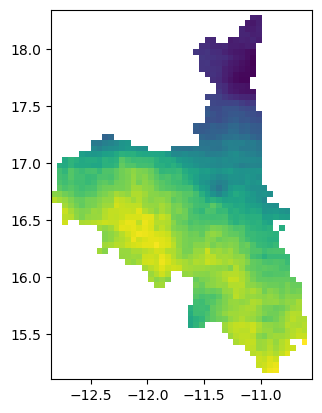

CRS (Coordinate Reference System): EPSG:4326
Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|
Width: 46
Height: 65
Data shape: (65, 46)


In [15]:
with rasterio.open(r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\Climate_Precipitation_Data\2010R.tif") as dataset:
    # 显示栅格数据（可视化）
    show(dataset)
    
    # 获取地理参考信息
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  # 仿射变换矩阵
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # 读取数据
    data = dataset.read(1)  # 读取第一波段
    print("Data shape:", data.shape)

In [17]:
import matplotlib.pyplot as plt
import os

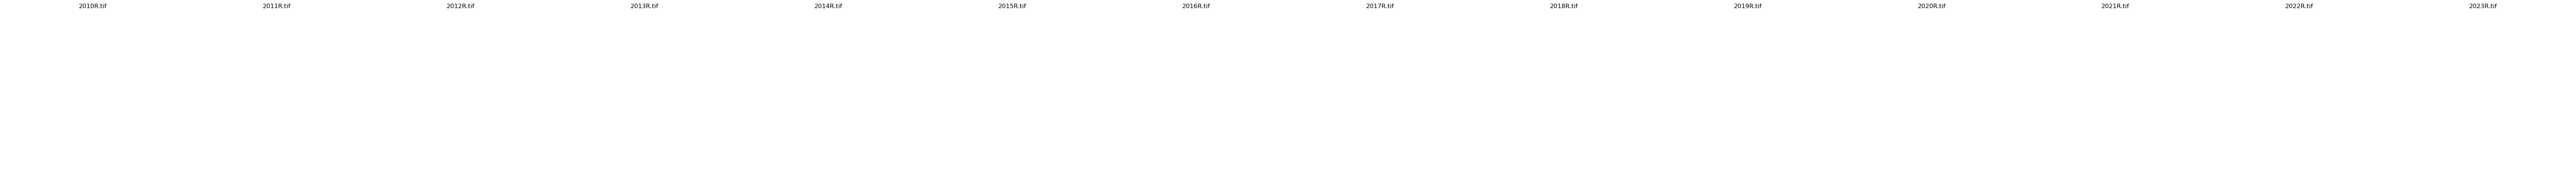

In [19]:

# Path to your folder containing .tif files
folder_path = r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\Climate_Precipitation_Data"

# Get all .tif files in the folder
tif_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]

# Create subplots based on the number of .tif files
fig, axes = plt.subplots(nrows=1, ncols=len(tif_files), figsize=(5 * len(tif_files), 5))

# If only one file, ensure axes is iterable
if len(tif_files) == 1:
    axes = [axes]

# Loop through each .tif file and display it
for ax, tif_file in zip(axes, tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        image = dataset.read(1)  # Read the first band
        
    #ax.imshow(image, cmap="gray")  # Change cmap if needed
    ax.set_title(tif_file)
    ax.axis("off")  # Remove axes for better visualization

plt.tight_layout()
plt.show()
